In [119]:
import requests
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [120]:
sg_reviews =[]

In [121]:
for i in range(1,50):
  ip=[]
  url="https://www.imdb.com/title/tt10919420/reviews/?ref_=tt_ql_urv"
  response = requests.get(url)
  soup = bs(response.content, "html.parser")
  reviews = soup.find_all("div", attrs={"class","text show-more__control"})
  for i in range(len(reviews)):
    ip.append(reviews[i].text)
    sg_reviews = sg_reviews + ip

In [122]:
with open("squidgame.txt", "w", encoding='utf8') as output:
  output.write(str(sg_reviews))
print(sg_reviews)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [123]:
import nltk
sg_rev_string = " ".join(sg_reviews)

In [124]:
#remove unwanted symbols in case if exists
sg_rev_string = re.sub("[^A-Za-z " "]+", " ",sg_rev_string).lower()
sg_rev_string = re.sub("[0-9 " "]+"," ", sg_rev_string)

In [125]:
sg_rev_words = sg_rev_string.split(" ")

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sg_rev_words, use_idf=True, ngram_range= (1,3))
X = vectorizer.fit_transform(sg_rev_words)

In [127]:
with open("/content/drive/MyDrive/DS/upendra/text mining- sentiment/stop.txt") as sw:
  stop_words= sw.read()
stop_words= stop_words.split("\n")

In [128]:
sg_rev_words = [w for w in sg_rev_words if w not in stop_words]

In [129]:
# Joinining all the reviews into single paragraph
sg_rev_string = " ".join(sg_rev_words)

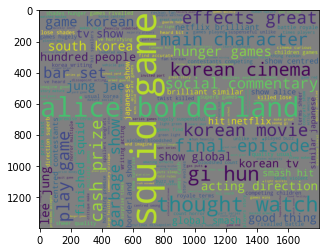

In [130]:
wordcloud_sg= WordCloud (
    background_color= "Grey",
    height= 1400,
    width=1800
).generate(sg_rev_string)
plt.imshow(wordcloud_sg)

**WORDCLOUD WItH BIGRAM**

In [131]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [132]:
WNL = nltk.WordNetLemmatizer()
# Lowercase and tokenize
text = sg_rev_string.lower()

In [133]:
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'","")

In [134]:
tokens = nltk.wordpunct_tokenize(text)
text1= nltk.Text(tokens)

In [135]:
# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]


In [136]:
# Create a set of stopwords
stopwords_wc = set(STOPWORDS)
customised_words = ['game','korean','cinema'] # If you want to remove any particular word form text which does not contribute much in meaning

In [137]:
new_stopwords = stopwords_wc.union(customised_words)

# Remove stop words
text_content = [word for word in text_content if word not in new_stopwords]

In [138]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [139]:
# Take only non-empty entries
text_content = [s for s in text_content if len(s) != 0]

# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

In [140]:
nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.trigrams(text_content))
print(bigrams_list)

dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [144]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(3, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])

[('lee jung jae', 1470), ('finished squid tv', 1225), ('squid tv show', 1225), ('tv show global', 1225), ('show global smash', 1225), ('global smash hit', 1225), ('smash hit netflix', 1225), ('hit netflix brilliant', 1225), ('netflix brilliant similar', 1225), ('brilliant similar japanese', 1225), ('similar japanese show', 1225), ('japanese show alice', 1225), ('show alice borderland', 1225), ('alice borderland show', 1225), ('borderland show centred', 1225), ('show centred contestant', 1225), ('centred contestant competing', 1225), ('contestant competing child', 1225), ('competing child game', 1225), ('child game cash', 1225), ('game cash prize', 1225), ('cash prize twist', 1225), ('prize twist killed', 1225), ('twist killed lose', 1225), ('killed lose shade', 1225), ('lose shade hunger', 1225), ('shade hunger game', 1225), ('hunger game rivalled', 1225), ('game rivalled battle', 1225), ('rivalled battle royale', 1225), ('battle royale term', 1225), ('royale term sheer', 1225), ('term

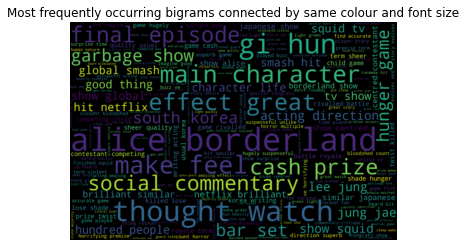

In [142]:
# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)

plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()